# Introducción al A-A
**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

<span style="color:blue">*Se recomienda hacer uso de las herramientas vistas en el lab 1 y lab 2 del práctico de la materia.*</span>

**Objetivos:** 
- Implementar los modelos vistos en clase tanŧo de regresión como de claificación sobre el data set de galaxias 
- Comparar la performance y seleccionar el mejor modelo 

# Paquetes necesarios 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10,6)

# Data set

Se hará uso del dataset curado en el anterior práctico remplazando el redshift (z) por distancia luminosidad (**distancia_L**) y agregando la magnitud absoluta (**Mag_abs**).

La distancia Luminosidad es calculada a partir del redshift  y la magnitud absoluta es calculada a partir de la distancia luminosidad y la modelMag_r

- **distancia_L**: Es la distancia a la galaxia, su calculo hace uso del brillo de la galaxia
- **Mag_abs**: Es el brillo que tendría la galaxia a una distancia fija (10 Mpc)
- **objID**: Es el id de las galaxias
- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **modelMag_u,modelMag_g, modelMag_r,modelMag_i,modelMag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **petroR90_r** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendrán el valor 0. 


,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs
objID,,,,,,,,,,,,,,
1.237674e+18,119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,1.0,0.0,0.0,135.131916,-21.191136
1.237674e+18,118.185239,33.699089,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,0.0,0.0,1.0,153.893111,-18.473102


(32623, 14)

'distribución de las variables físicas de las galaxias'

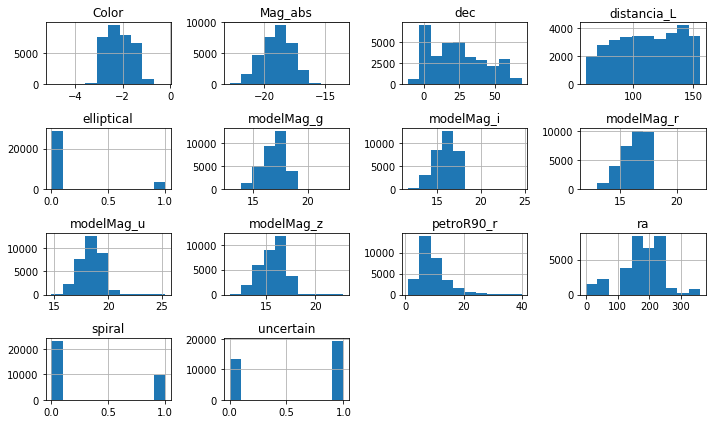

In [4]:
dataset=pd.read_csv('galaxias_2.csv',index_col=['objID'])
display(dataset.head(2))
display(dataset.shape)
display('distribución de las variables físicas de las galaxias')
dataset.hist()
plt.tight_layout()

# Analisis de Datos

In [5]:
dataset.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'Color', 'elliptical', 'spiral',
       'uncertain', 'distancia_L', 'Mag_abs'],
      dtype='object')

In [6]:
data_cl = dataset.loc[~(dataset.index.astype(str).duplicated(keep="first"))]

In [7]:
def galaxy_type(row):
    if row["elliptical"]:
        return "E"
    elif row["spiral"]:
        return "S"
    else:
        return "I"

In [8]:
data_cl["Type"] = data_cl.apply(galaxy_type, axis=1)

/home/franco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


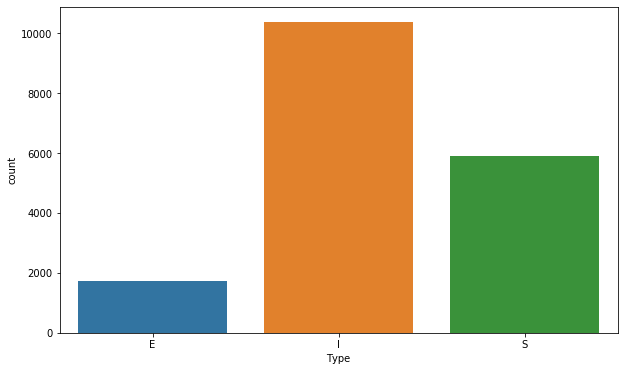

In [9]:
sns.countplot(data_cl["Type"])

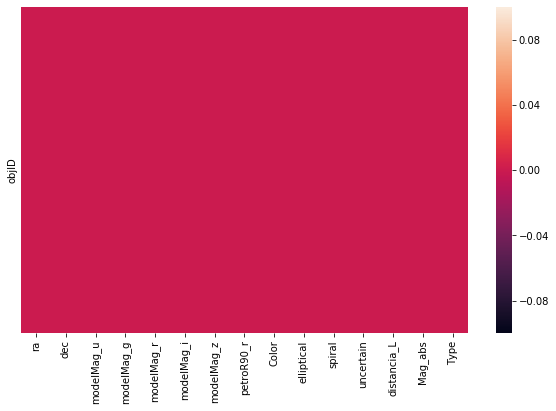

In [10]:
sns.heatmap(data_cl.isna(), yticklabels=False)

In [11]:
def distribution_per_type(df, col_name="", bins=20):
    plt.title(f"{col_name.capitalize()} Distribution")
    sns.distplot(df[df["elliptical"] == 1][col_name],label="elliptical", bins=bins)
    sns.distplot(df[df["spiral"] == 1][col_name],label="spiral", bins=bins)
    sns.distplot(df[df["uncertain"] == 1][col_name],label="irregular", bins=bins)
    plt.legend()
    
def exploratory_plots(df, col_name=""):
    plt.subplot(3, 1, 1)
    distribution_per_type(df, col_name)
    plt.subplot(3, 1, 2)
    plt.title(f"{col_name.capitalize()} Boxplot")
    sns.boxplot(x="Type", y=col_name, data=df)

    plt.subplot(3, 1, 3)
    plt.title(f"{col_name.capitalize()} Boxplot w/o Outliers")
    sns.boxplot(x="Type", y=col_name, data=df, showfliers=False)
    
    plt.tight_layout()

## Pair Plot

In [12]:
data_cl.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'Color', 'elliptical', 'spiral',
       'uncertain', 'distancia_L', 'Mag_abs', 'Type'],
      dtype='object')

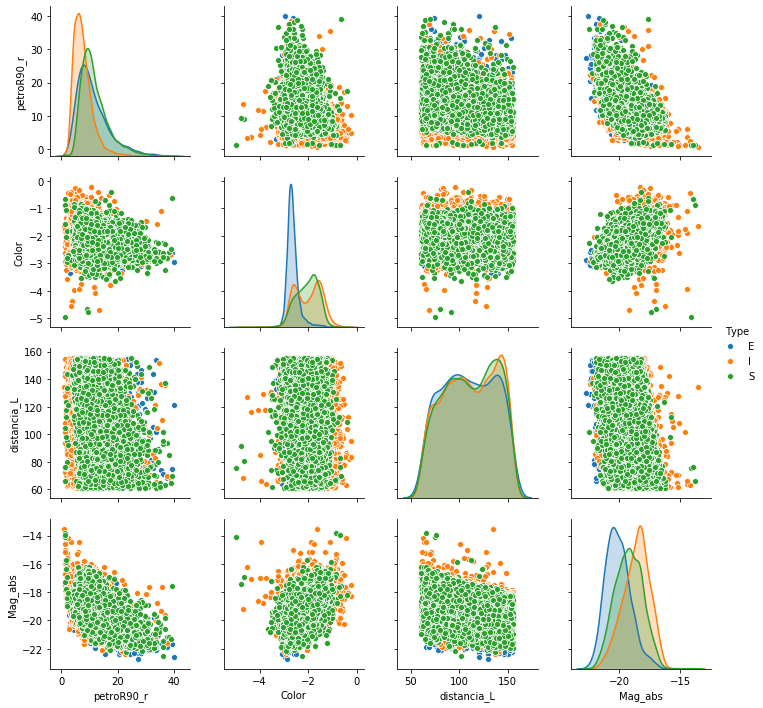

In [13]:
plot_cols = ['petroR90_r', 'Color', 'distancia_L', 'Mag_abs', 'Type']
sns.pairplot(data_cl[plot_cols], hue="Type")

## Color

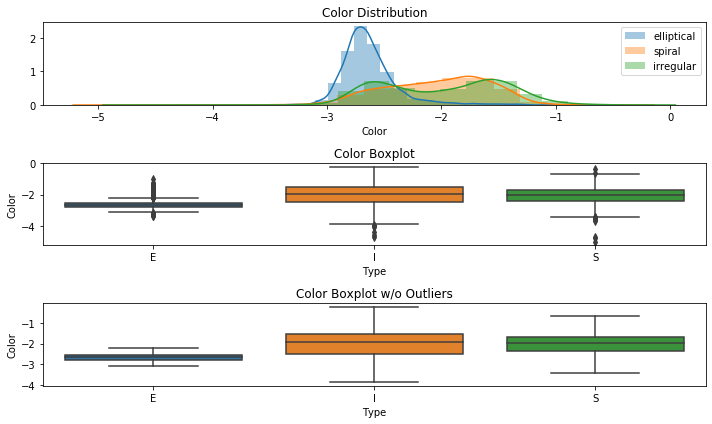

In [14]:
exploratory_plots(data_cl, "Color")

## PetroR90

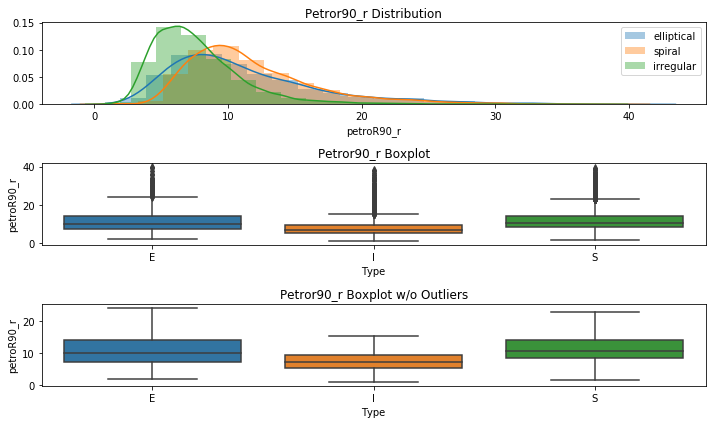

In [15]:
exploratory_plots(data_cl, "petroR90_r")

## Distancia L

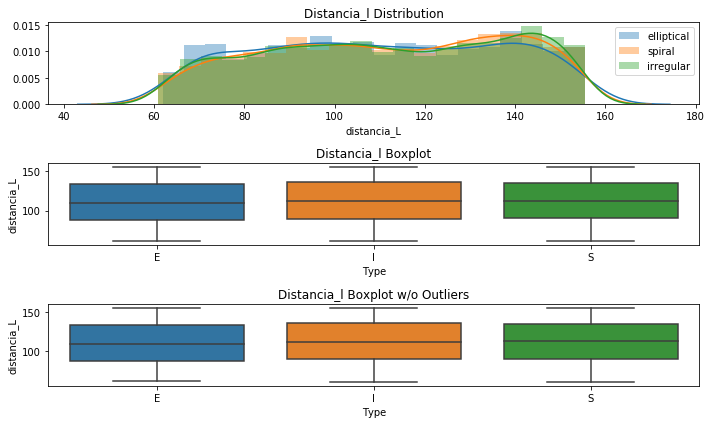

In [16]:
exploratory_plots(data_cl, "distancia_L")

## Mag_abs

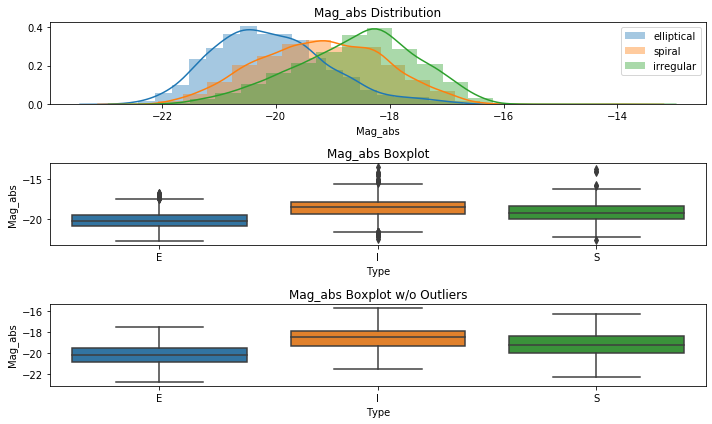

In [17]:
exploratory_plots(data_cl, "Mag_abs")

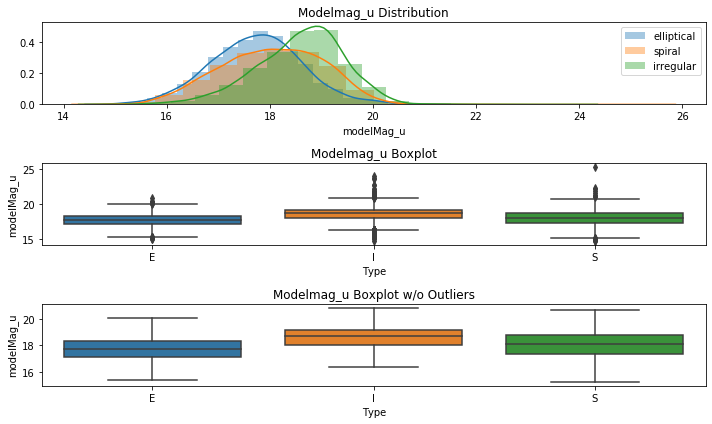

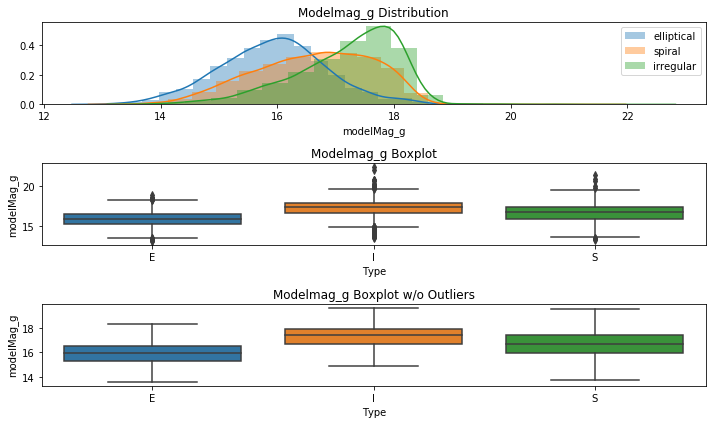

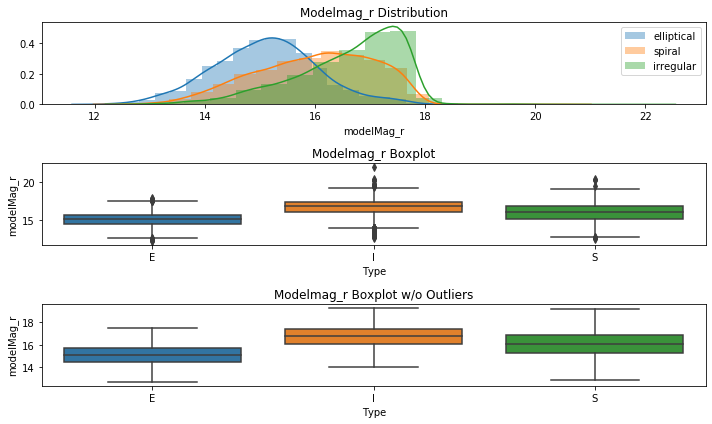

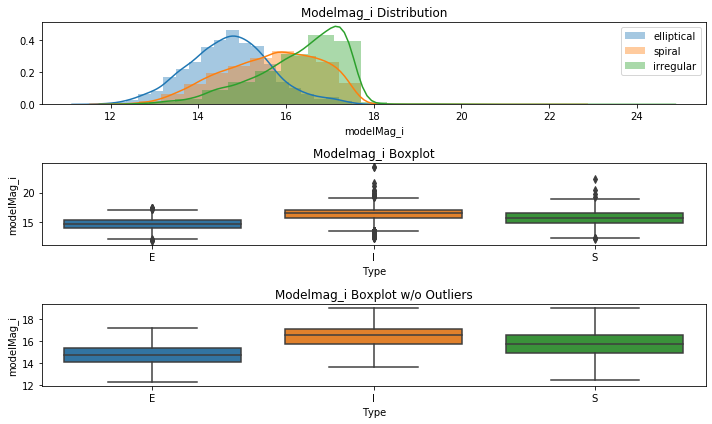

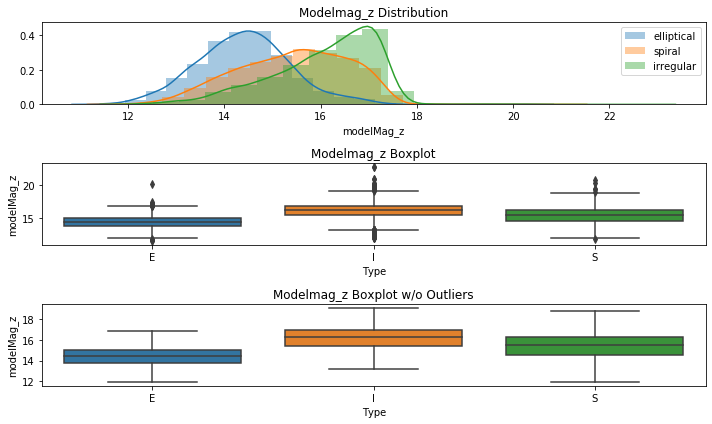

In [18]:
for mag in ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']:
    plt.figure()
    exploratory_plots(data_cl, mag)

# Regresión 


Existe una relación empírica entre el radio efectivo (petro petroR90_r) y la magnitud absoluta para galaxias  (datos de Bender et al. 1992, ApJ., 399, 462)

Por lo tanto, el valor a predecir sera  **Mag_abs** la cual está contenida en un intervalo real de tamaño ~ 9mag, el atributo a usar sera el logaritmo en base diez de la variable **petroR90_r**.

Detallar los pasos realizados (split, fit, metrica..) en el uso de el algoritmo de Regresión lineal con y sin regularización.

Responda:
- Que significa el error cuadrático?
- Que unidades tiene?
- Es necesaria la regularización?
- Es bueno valor obtenido en la métrica?
- Que pasa si se distingue por tipo de galaxia?

In [19]:
data_cl["log_petroR90"] = np.log10(data_cl["petroR90_r"])

/home/franco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


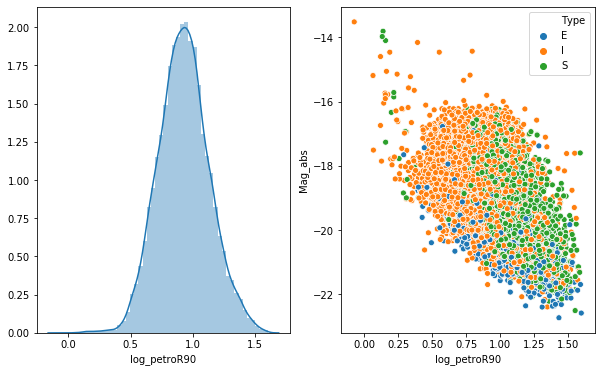

In [20]:
f, axs = plt.subplots(1,2)
sns.distplot(data_cl["log_petroR90"], ax=axs[0])
sns.scatterplot(x="log_petroR90", y="Mag_abs", data=data_cl,hue="Type", ax=axs[1])

## Train / Validation / Test Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
X = data_cl["log_petroR90"]
y = data_cl["Mag_abs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42421)
X_train, X_test = X_train.values.reshape(-1,1), X_test.values.reshape(-1,1)

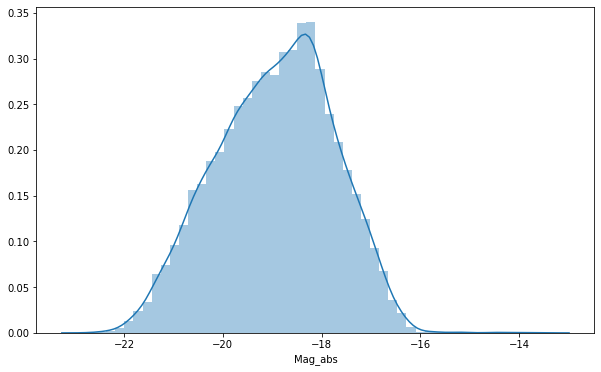

In [23]:
sns.distplot(y)

In [24]:
y.describe()

count    18007.000000
mean       -18.937537
std          1.184483
min        -22.730648
25%        -19.785564
50%        -18.858549
75%        -18.082197
max        -13.516647
Name: Mag_abs, dtype: float64

## Modelo Linea y Regularización

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

model_lasso = Lasso(alpha=0.01, random_state=4212)
model_lasso.fit(X_train, y_train)
#list(zip(X.columns, model.coef_))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=4212,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
y_pred = model.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

In [27]:
print("-"*80)
print("Linear Regression")
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("SE:  ", mean_squared_error(y_test, y_pred) * y_test.shape[0])
print("-"*80)
print("Linear Regression with Lasso Regularization")
print("R2 Score: ", r2_score(y_test, y_pred_lasso))
print("MSE: ", mean_squared_error(y_test, y_pred_lasso))
print("SE:  ", mean_squared_error(y_test, y_pred_lasso) * y_test.shape[0])

--------------------------------------------------------------------------------
Linear Regression
R2 Score:  0.2789919970010071
MSE:  1.0034302380303863
SE:   3614.3557173854515
--------------------------------------------------------------------------------
Linear Regression with Lasso Regularization
R2 Score:  0.2761224678661435
MSE:  1.0074237752600075
SE:   3628.7404384865467


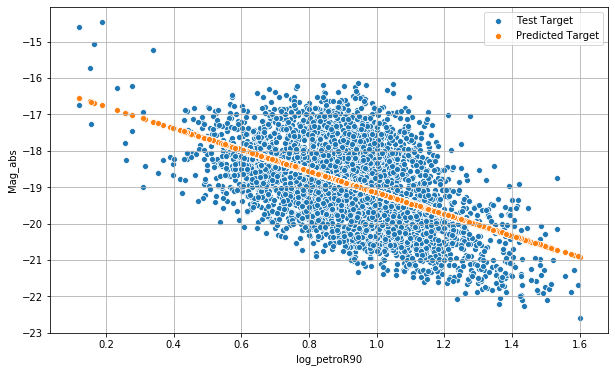

In [28]:
sns.scatterplot(x=X_test.reshape(1,-1)[0], y=y_test, label="Test Target")
sns.scatterplot(x=X_test.reshape(1,-1)[0], y=y_pred, label="Predicted Target")
plt.xlabel("log_petroR90")
plt.legend()
plt.grid()

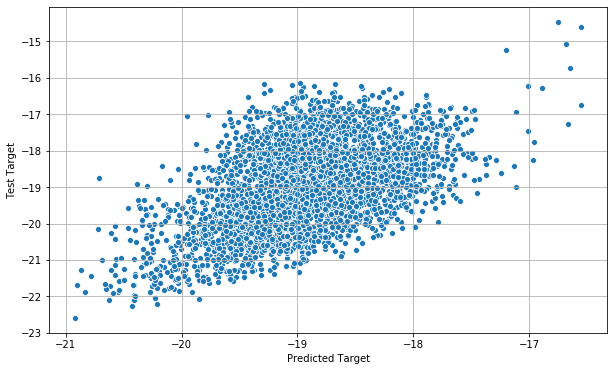

In [29]:
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Target")
plt.ylabel("Test Target")
plt.grid()

## Modelo por tipo de galaxia

In [30]:
X_d, y_d = {}, {}
X_train_d, X_test_d, y_train_d, y_test_d = {}, {}, {}, {}

for ttype in data_cl["Type"].unique():
    mask = data_cl["Type"] == ttype
    X_d[ttype] = data_cl[mask]["log_petroR90"]
    y_d[ttype] = data_cl[mask]["Mag_abs"]

    X_train_d[ttype], X_test_d[ttype], y_train_d[ttype], y_test_d[ttype] = \
    train_test_split(X_d[ttype], y_d[ttype], test_size=0.2, random_state=42421)
    X_train_d[ttype], X_test_d[ttype] = X_train_d[ttype].values.reshape(-1,1), X_test_d[ttype].values.reshape(-1,1)

In [32]:
models = {}
y_pred_train_d = {}
y_pred_test_d  = {}
for ttype in data_cl["Type"].unique():
    models[ttype] = LinearRegression()
    models[ttype].fit(X_train_d[ttype], y_train_d[ttype])
    y_pred_train_d[ttype] = models[ttype].predict(X_train_d[ttype])
    y_pred_test_d[ttype] = models[ttype].predict(X_test_d[ttype])

for ttype in data_cl["Type"].unique():
    print("-"*80)
    print(ttype)
    print("-"*80)
    print("R2 Score: ", r2_score(y_test_d[ttype], y_pred_test_d[ttype]))
    print("MSE: ", mean_squared_error(y_test_d[ttype], y_pred_test_d[ttype]))
    print(models[ttype].coef_)

--------------------------------------------------------------------------------
E
--------------------------------------------------------------------------------
R2 Score:  0.4452439100100507
MSE:  0.6325553505792612
[-3.32708517]
--------------------------------------------------------------------------------
I
--------------------------------------------------------------------------------
R2 Score:  0.14991644057874098
MSE:  1.038591271711517
[-2.08425229]
--------------------------------------------------------------------------------
S
--------------------------------------------------------------------------------
R2 Score:  0.2861847012598092
MSE:  0.8544626670983083
[-3.5546626]


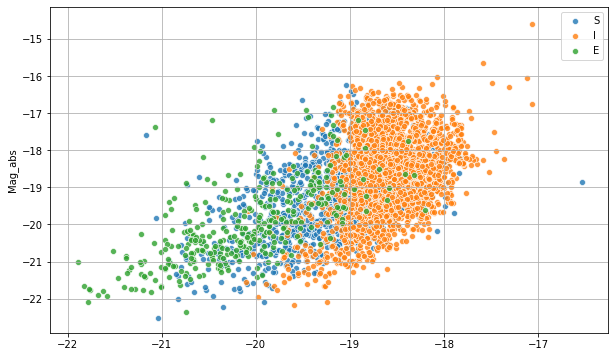

In [33]:
for ttype in data_cl["Type"].unique()[::-1]:
    sns.scatterplot(x=y_pred_test_d[ttype], y=y_test_d[ttype], alpha=0.8, label=ttype)
    plt.grid()
    plt.legend()

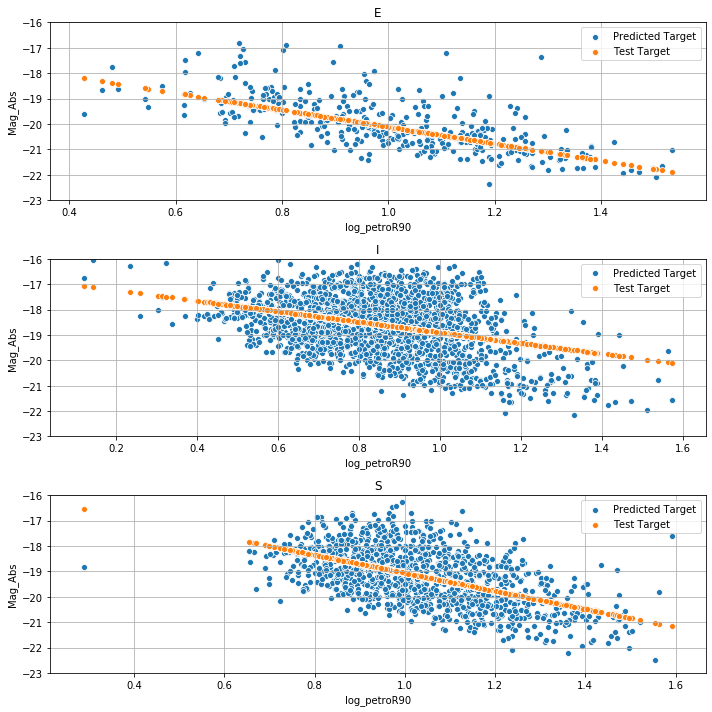

In [34]:
f, axs = plt.subplots(3,1, figsize=(10,10))
for idx, ttype in enumerate(data_cl["Type"].unique()):
    sns.scatterplot(y=y_test_d[ttype],      x=X_test_d[ttype].reshape(1,-1)[0], ax=axs[idx],
                   label="Predicted Target")
    sns.scatterplot(y=y_pred_test_d[ttype], x=X_test_d[ttype].reshape(1,-1)[0], ax=axs[idx], 
                    label="Test Target")
    
    axs[idx].set_xlabel("log_petroR90")
    axs[idx].set_ylabel("Mag_Abs")
    axs[idx].legend()
    axs[idx].grid()
    axs[idx].set_title(ttype)
    axs[idx].set_ylim([-23, -16])

plt.tight_layout()

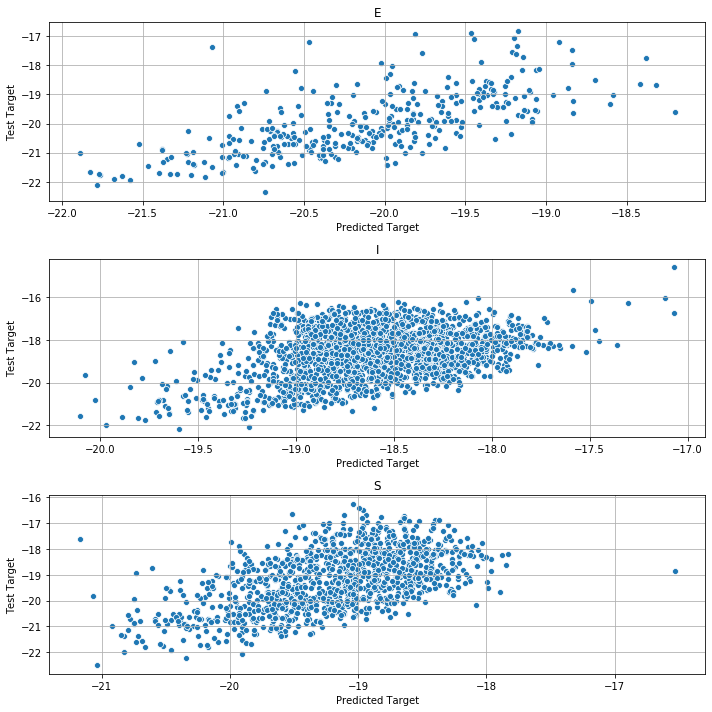

In [35]:
f, axs = plt.subplots(3,1, figsize=(10,10))
for idx, ttype in enumerate(data_cl["Type"].unique()):
    sns.scatterplot(x=y_pred_test_d[ttype], y=y_test_d[ttype], ax=axs[idx])
    axs[idx].grid()
    axs[idx].set_title(ttype)
    axs[idx].set_xlabel("Predicted Target")
    axs[idx].set_ylabel("Test Target")
plt.tight_layout()

## Respuestas


**Que significa el error cuadrático? Que unidades tiene?**

El error cuadrático (o suma de residuos cuadrados -- SSE) esta determinado por la siguiente expresión:

$$SSE=\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

Donde:
  * $n$ es la cantidad de observaciones
  * $y_i$ es el valor real de la observación
  * $\hat{y_i}$ es el valor estimado por el modelo

De esta forma el error cuadrático es una medida de que tan distintas son las predicciones del modelo comparadas al valor real. Al estar la diferencia elevada la cuadrado suceden 2 cosas:
  1. Todos los residuos incrementan el valor sumatoria debido a que todos queda positivos luego de ser elevados al cuadrado
  1. Las residuos más grandes se penalizan más que los más pequeños

La unidad de esta magnitud es la unidad de la salida elevada al cuadrado. Al no tener la misma unidad que la salida y ser una una suma de errores, es dificil tener una idea clara de cuando el valor del error cuadrático es aceptable o no.

Otra métrica que es más intuitiva para modelos de regresión es $R^2$ que esta determinada por :
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} $$

Donde:
  * $n$ es la cantidad de observaciones
  * $y_i$ es el valor real de la observación
  * $\hat{y_i}$ es el valor estimado por el modelo
  * $\bar{y}$ es la media de las observaciones

El denominador es proporcional a la varianza de la salida. Por lo tanto $R^2$ nos dice que tanto de la varianza de la salida es explicada o representada por nuestro modelo


**Es necesaria la regularización?**

En este caso estuvimos entrenando modelos utilizando solo una feature, por lo tanto la regularización no tiene sentido ya que no hay riesgo de overfitting.

**Es bueno valor obtenido en la métrica?**

Los valores de las metricas que obtuvimos son:
  * Error cuadrático:        3614.3557173854515
  * Error cuadrático medio:  1.0034302380303863
  * R2:                      0.2789919970010071

Mientras que la variable a estimar tiene las siguientes características:
  * Media:       -18.937537
  * Varianza:     1.403



**Que pasa si se distingue por tipo de galaxia?**
Al distinguir por tipo de galaxia el modelo lineal tiene un mejor comportamiento sobre algunos de las morfologias. Sobre todo para las elipticas, cuya distribución esta menos distribuida alrededor de la recta del modelo.

Las otras morfologías siguen estan bastante distribuidas alrededor de la recta, sobre todo las irregulares

# Clasificación 

## Clasificación binaria 

Haga uso de los atributos petroR90_r, Color y Mag_abs para clasificar en  elípticas y espirales.
Use los siguientes modelos:
    - Perceptrón
    - Regresión logística
    - Vecinos más cercanos
Para cada uno de ellos muestre:
        - Matriz de confusión
        - Visualización de la frontera de decisión

In [36]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

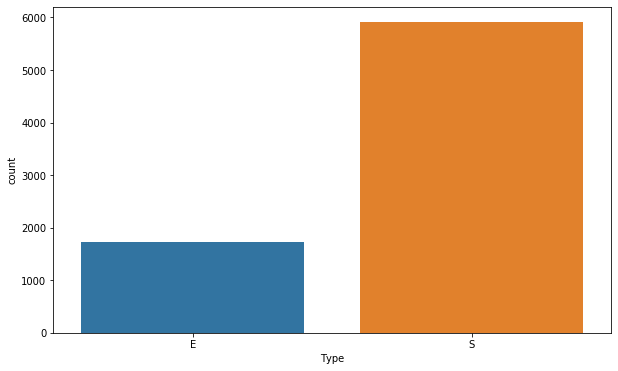

In [37]:
data_clf = data_cl[data_cl["Type"] != "I"]
sns.countplot(data_clf["Type"])

In [38]:
X_clf = data_clf[["petroR90_r", "Mag_abs", "Color"]]
y_clf = data_clf["Type"]

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42421)
#X_train, X_test = X_train.values.reshape(-1,1), X_test.values.reshape(-1,1)

In [39]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std   = std.transform(X_test)

In [40]:
def print_classification_report(y_real, y_pred):
    print(f"Accuracy {accuracy_score(y_real, y_pred)}")
    print("-"*100)
    print(classification_report(y_real, y_pred))
    plt.figure()
    sns.heatmap(confusion_matrix(y_real, y_pred), 
                #xticklabels=x_ticks, #[0, 1],
                #yticklabels=x_ticks, #[0, 1],
                cmap="jet",
                annot=True,
               )
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    plt.show()

In [41]:
perc    = Perceptron(random_state=421)
log_reg = LogisticRegression(random_state=421)
knn     = KNeighborsClassifier(n_neighbors=5)

### Hiper parametros por defecto

In [42]:
for model in [perc, log_reg, knn]:
    model.fit(X_train_std, y_train)

/home/franco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
for model in [perc, log_reg, knn]:
    y_pred_train = model.predict(X_train_std)
    y_pred_test = model.predict(X_test_std)
    print("="*80)
    print(model.__class__.__name__)
    print("="*80)
    print("Train: ", accuracy_score(y_train, y_pred_train))
    print("Test: ", accuracy_score(y_test, y_pred_test))
    #print("Train")
    #print("-"*80)
    #print_classification_report(y_train, y_pred_train)
    #print("-"*80)
    #print("Test")
    #print("-"*80)
    #print_classification_report(y_test, y_pred_test)

Perceptron
Train:  0.5929319371727748
Test:  0.5925441465009811
LogisticRegression
Train:  0.8444044502617801
Test:  0.8404185742315239
KNeighborsClassifier
Train:  0.899705497382199
Test:  0.8449967298888162


El perceptron parece andar bastante mal comparado al resto. Los otros parecen funcionar un poco mejor con los parametros por defecto. Vemos como son los errores que estamos cometiendo de los 2 modelos que andan mejor

LogisticRegression
Train
--------------------------------------------------------------------------------
Accuracy 0.8444044502617801
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.69      0.58      0.63      1392
           S       0.88      0.92      0.90      4720

    accuracy                           0.84      6112
   macro avg       0.78      0.75      0.77      6112
weighted avg       0.84      0.84      0.84      6112



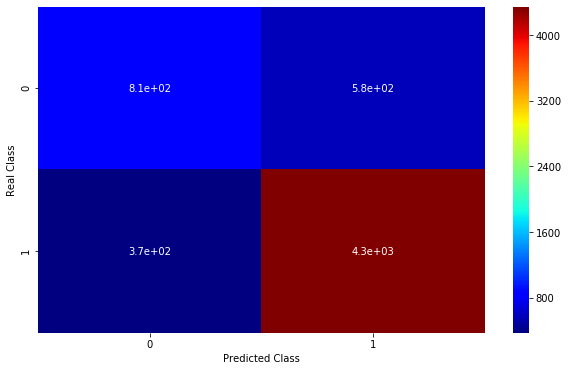

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.8404185742315239
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.65      0.59      0.62       338
           S       0.89      0.91      0.90      1191

    accuracy                           0.84      1529
   macro avg       0.77      0.75      0.76      1529
weighted avg       0.84      0.84      0.84      1529



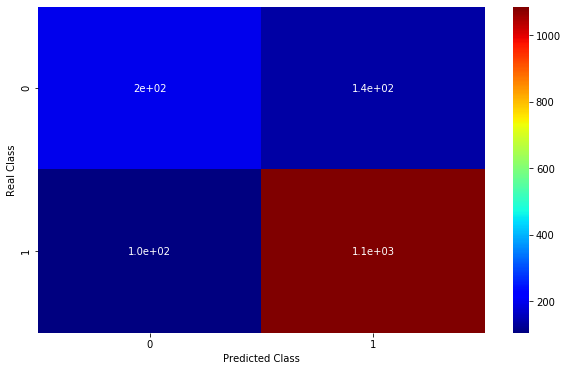

KNeighborsClassifier
Train
--------------------------------------------------------------------------------
Accuracy 0.899705497382199
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.79      0.76      0.77      1392
           S       0.93      0.94      0.94      4720

    accuracy                           0.90      6112
   macro avg       0.86      0.85      0.85      6112
weighted avg       0.90      0.90      0.90      6112



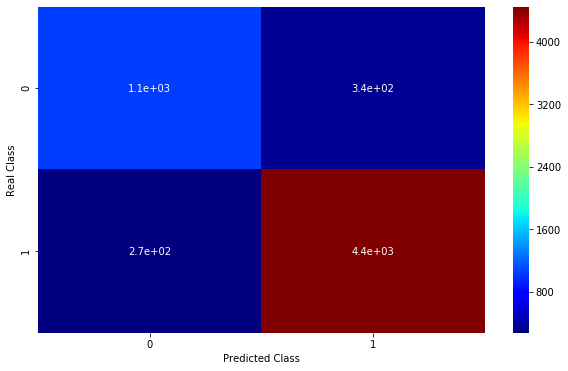

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.8449967298888162
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.66      0.62      0.64       338
           S       0.89      0.91      0.90      1191

    accuracy                           0.84      1529
   macro avg       0.78      0.77      0.77      1529
weighted avg       0.84      0.84      0.84      1529



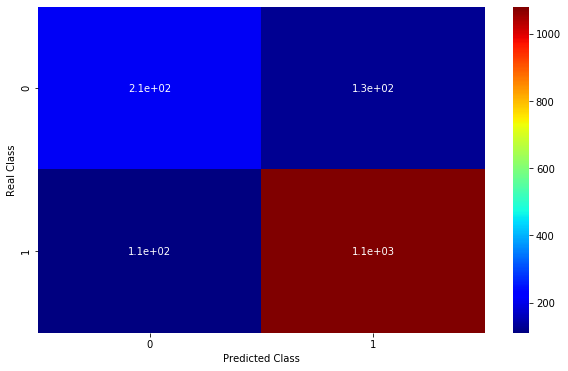

In [44]:
for model in [log_reg, knn]:
    y_pred_train = model.predict(X_train_std)
    y_pred_test = model.predict(X_test_std)
    print("="*80)
    print(model.__class__.__name__)
    print("="*80)
    print("Train")
    print("-"*80)
    print_classification_report(y_train, y_pred_train)
    print("-"*80)
    print("Test")
    print("-"*80)
    print_classification_report(y_test, y_pred_test)

Vemos que ambos modelos tienen metricas malas (recall y precision) para la clase "E" o Eliptica.

Vamos a ver si utilizando otros valores en los hiperparametros podemos mejorar un poco esto

### Ajuste Hiper Parametros

Como no hay muchos hiperparametros vamso a usar validation curve

In [45]:
from sklearn.model_selection import validation_curve

In [46]:
x_logspace =  np.logspace(-6,1,7)
train_scores, valid_scores =  validation_curve(LogisticRegression(solver="lbfgs"),
                                               X_train_std, y_train, "C", x_logspace,
                                               cv=5)

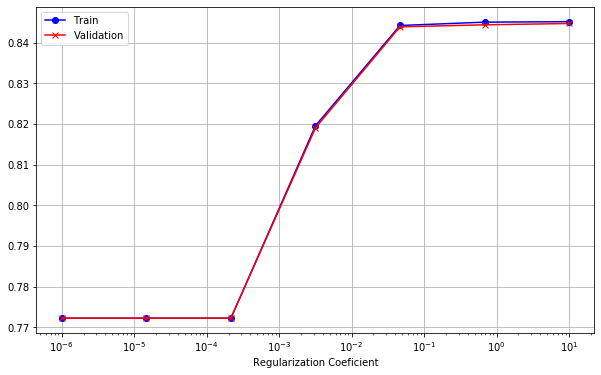

In [47]:
plt.semilogx(x_logspace, np.mean(train_scores,axis=1), "-ob", label="Train")
plt.semilogx(x_logspace, np.mean(valid_scores,axis=1), "-xr", label="Validation")
plt.grid()
plt.xlabel("Regularization Coeficient")
plt.legend(loc=0)

De este grafico se puede ver que la regularizacion no sirve mucho en este caso. Esto se debe a que no estamos overfiteando los datos ya que es una regresion logistica lineal.

In [48]:
x_logspace =  range(1, 15)
train_scores, valid_scores =  validation_curve(KNeighborsClassifier(),
                                               X_train_std, y_train, "n_neighbors", x_logspace,
                                               cv=5, n_jobs=-1)

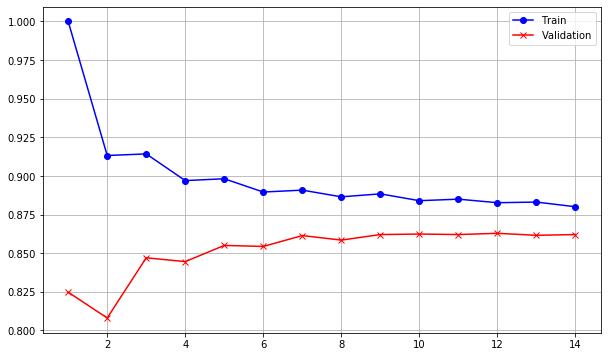

In [49]:
plt.plot(x_logspace, np.mean(train_scores,axis=1), "-ob", label="Train")
plt.plot(x_logspace, np.mean(valid_scores,axis=1), "-xr", label="Validation")
plt.grid()
plt.legend(loc=0)

Se puede ver como con K veciones <= 4 o 5 hay algo de overfiting de los datos, pero para valores >= 9 ya el modelo funciona correctamente

Vemos que pasa con el test cuando usamos nneighbors = 9

KNeighborsClassifier
Train
--------------------------------------------------------------------------------
Accuracy 0.8895615183246073
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.77      0.74      0.75      1392
           S       0.92      0.93      0.93      4720

    accuracy                           0.89      6112
   macro avg       0.85      0.84      0.84      6112
weighted avg       0.89      0.89      0.89      6112



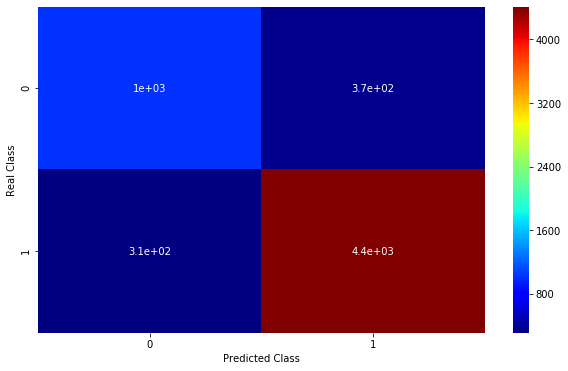

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.854153041203401
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.67      0.67      0.67       338
           S       0.91      0.91      0.91      1191

    accuracy                           0.85      1529
   macro avg       0.79      0.79      0.79      1529
weighted avg       0.85      0.85      0.85      1529



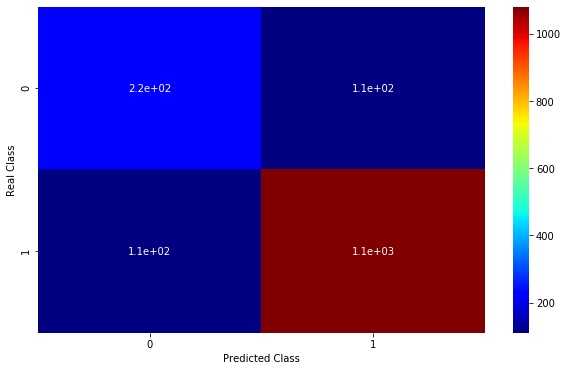

In [50]:
knn     = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std, y_train)
y_pred_train = knn.predict(X_train_std)
y_pred_test = knn.predict(X_test_std)
print("="*80)
print(knn.__class__.__name__)
print("="*80)
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)

El modelo mejora un poco respecto al que teniamos con los modelos por defecto.

De todas formas se sigue viendo que precision y recall para las galaxias Espirales es peor que para las otras. Esto se debe a que tenemos un problema de clases no balanceadas

### Curvas Precision/Recall y ROC

In [51]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder

y_scores = cross_val_predict(LogisticRegression(solver="lbfgs"),
                                               X_train_std, y_train ,cv=5,
                                               method="decision_function")


Text(0.5, 0, 'Threshold')

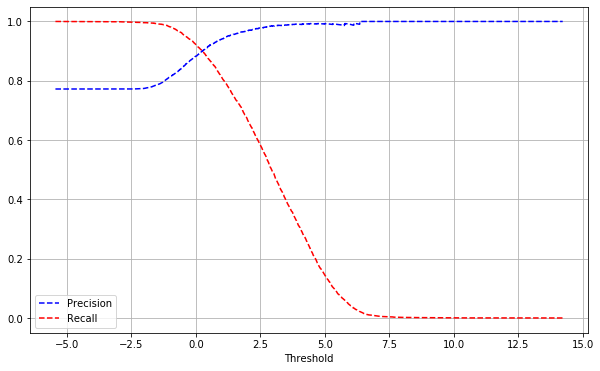

In [52]:
prec, rec, th = precision_recall_curve(LabelEncoder().fit_transform(y_train), y_scores)
plt.plot(th, prec[:-1], "--b", label="Precision")
plt.plot(th, rec[:-1], "--r", label="Recall")
plt.legend()
plt.grid()
plt.xlabel("Threshold")

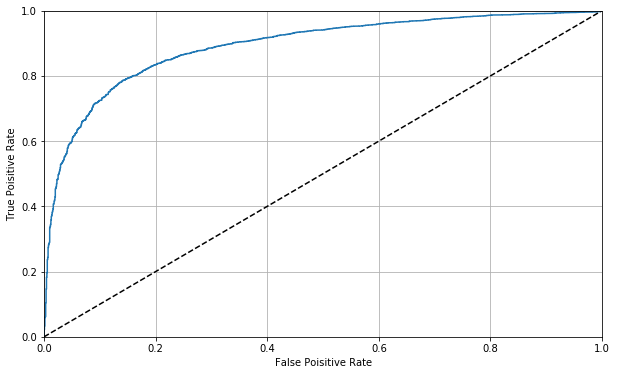

In [53]:
fpr, tpr, th = roc_curve(LabelEncoder().fit_transform(y_train), y_scores)

plt.plot(fpr, tpr, label="ROC Log Regr")
plt.plot([0,1],[0,1], "--k")
plt.axis([0,1,0,1])
plt.xlabel("False Poisitive Rate")
plt.ylabel("True Poisitive Rate")
plt.grid()


### Fronteras

In [54]:
from matplotlib.colors import ListedColormap
from ml.visualization import plot_confusion_matrix, classifier_boundary

## Clasificación multiclase
Haga uso de los atributos petroR90_r, Color y Mag_abs para clasificar en elípticas, espirales e irregulares.
Use los siguientes modelos:
    - SGDClassifier con y sin Ajuste de Hiperparámetros
    - Árbol de Decisión con y sin Ajuste de Hiperparámetros
Para cada uno de ellos muestre:
        - Accuracy
        - Precision
        - Recall
        - F1
        - matriz de confusión

        

Responda: 
- Que métrica es la más apropiadad a usar en este problema de clasificación?

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
data_clf = data_cl
X_clf = data_clf[["petroR90_r", "Mag_abs", "Color"]]
y_clf = data_clf["Type"]
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42421)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std   = std.transform(X_test)

### Parametros por defecto

In [57]:
sgd_clf    = SGDClassifier(random_state=421)
tree_clf = DecisionTreeClassifier(random_state=421)

In [58]:
for model in [sgd_clf,tree_clf]:
    model.fit(X_train_std, y_train)

In [59]:
for model in [sgd_clf,tree_clf]:
    y_pred_train = model.predict(X_train_std)
    y_pred_test = model.predict(X_test_std)
    print("="*80)
    print(model.__class__.__name__)
    print("="*80)
    print("Train: ", accuracy_score(y_train, y_pred_train))
    print("Test: ", accuracy_score(y_test, y_pred_test))
    #print("Train")
    #print("-"*80)
    #print_classification_report(y_train, y_pred_train)
    #print("-"*80)
    #print("Test")
    #print("-"*80)
    #print_classification_report(y_test, y_pred_test)

SGDClassifier
Train:  0.6416522040958
Test:  0.648528595224875
DecisionTreeClassifier
Train:  1.0
Test:  0.5866185452526375


Con los parametros por defecto vemos que el arbol de decision esta overfiteando

### Ajuste de Hiper Parametros

In [60]:
from sklearn.model_selection import GridSearchCV

#### SGD

In [61]:
param_grid = {
    "loss":['hinge', 'log', "perceptron"],
    "penalty": ["l1", "l2", None],
    "alpha": [1e-5, 1e-4, 1e-3],
    }
sgd_clf    = SGDClassifier(random_state=2402)
grid_sgd = GridSearchCV(sgd_clf, param_grid=param_grid, cv=5, scoring="accuracy")

In [62]:
grid_sgd.fit(X_train_std, y_train)
means = grid_sgd.cv_results_['mean_test_score']
stds = grid_sgd.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, grid_sgd.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

0.6565 (+/-0.0145) para {'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}
0.6564 (+/-0.0139) para {'alpha': 0.001, 'loss': 'log', 'penalty': None}
0.6545 (+/-0.0135) para {'alpha': 0.0001, 'loss': 'log', 'penalty': None}
0.6544 (+/-0.0122) para {'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}
0.6544 (+/-0.0133) para {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l2'}
0.6541 (+/-0.0193) para {'alpha': 1e-05, 'loss': 'hinge', 'penalty': 'l2'}
0.6537 (+/-0.0169) para {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}
0.6501 (+/-0.0073) para {'alpha': 1e-05, 'loss': 'log', 'penalty': 'l1'}
0.6493 (+/-0.0227) para {'alpha': 1e-05, 'loss': 'hinge', 'penalty': None}
0.6477 (+/-0.0136) para {'alpha': 1e-05, 'loss': 'log', 'penalty': 'l2'}
0.6477 (+/-0.0136) para {'alpha': 1e-05, 'loss': 'log', 'penalty': None}
0.6426 (+/-0.0087) para {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.6423 (+/-0.0079) para {'alpha': 0.001, 'loss': 'hinge', 'penalty': None}
0.6421 (+/-0.0096) para {'alpha': 0.001,

SGDClassifier
Train:  0.654564387365498
Test:  0.6585230427540255
Train
--------------------------------------------------------------------------------
Accuracy 0.654564387365498
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.51      0.09      0.16      1379
           I       0.67      0.89      0.77      8271
           S       0.60      0.41      0.49      4755

    accuracy                           0.65     14405
   macro avg       0.59      0.46      0.47     14405
weighted avg       0.63      0.65      0.62     14405



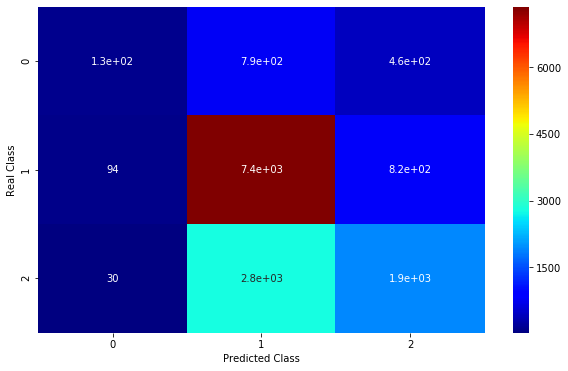

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.6585230427540255
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.48      0.09      0.14       351
           I       0.68      0.89      0.77      2095
           S       0.60      0.40      0.48      1156

    accuracy                           0.66      3602
   macro avg       0.58      0.46      0.47      3602
weighted avg       0.63      0.66      0.62      3602



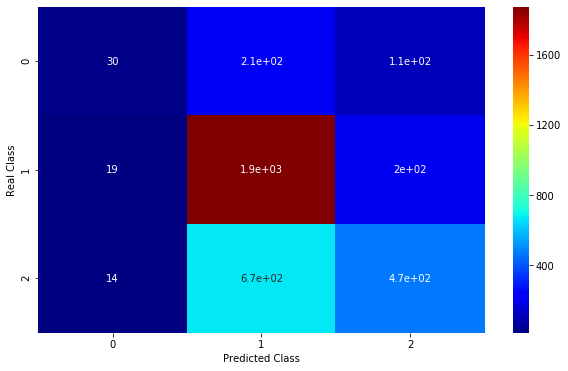

In [63]:
best_sgd = grid_sgd.best_estimator_
best_sgd.fit(X_train_std, y_train)

y_pred_train = best_sgd.predict(X_train_std)
y_pred_test = best_sgd.predict(X_test_std)
print("="*80)
print(best_sgd.__class__.__name__)
print("="*80)
print("Train: ", accuracy_score(y_train, y_pred_train))
print("Test: ", accuracy_score(y_test, y_pred_test))
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)

#### Arbol de Decisión

In [64]:
param_grid = {
    "criterion":['gini', 'entropy'],
    "max_depth": [3, 4, 5, 7],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
    }
tree_clf = DecisionTreeClassifier(random_state=421)
grid_tree = GridSearchCV(tree_clf, param_grid=param_grid, cv=5, scoring="accuracy")

In [65]:
grid_tree.fit(X_train_std, y_train)
means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, grid_tree.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))
print()

0.6753 (+/-0.0155) para {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.6753 (+/-0.0155) para {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}
0.6752 (+/-0.0157) para {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}
0.6751 (+/-0.0159) para {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}
0.6750 (+/-0.0163) para {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
0.6750 (+/-0.0163) para {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}
0.6743 (+/-0.0201) para {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3}
0.6741 (+/-0.0222) para {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 6}
0.6739 (+/-0.0221) para {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2}
0.6737 (+/-0.0213) para {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}
0.6737 (+/-0.0212) para {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}
0.6732 (+/-0.0212) para {'criterion': 'entropy', '

DecisionTreeClassifier
Train:  0.6846928149947935
Test:  0.674069961132704
Train
--------------------------------------------------------------------------------
Accuracy 0.6846928149947935
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.51      0.29      0.37      1379
           I       0.70      0.86      0.77      8271
           S       0.67      0.49      0.57      4755

    accuracy                           0.68     14405
   macro avg       0.63      0.55      0.57     14405
weighted avg       0.67      0.68      0.67     14405



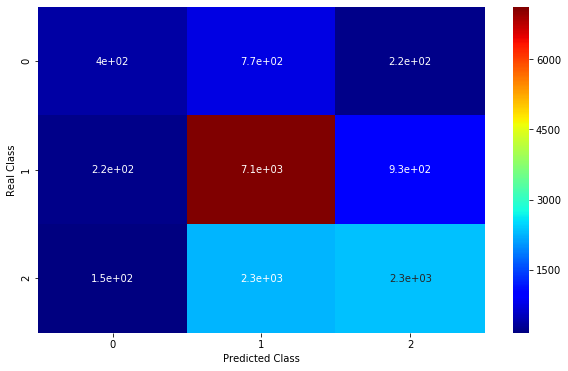

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.674069961132704
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.48      0.27      0.34       351
           I       0.70      0.85      0.77      2095
           S       0.64      0.48      0.55      1156

    accuracy                           0.67      3602
   macro avg       0.61      0.53      0.55      3602
weighted avg       0.66      0.67      0.66      3602



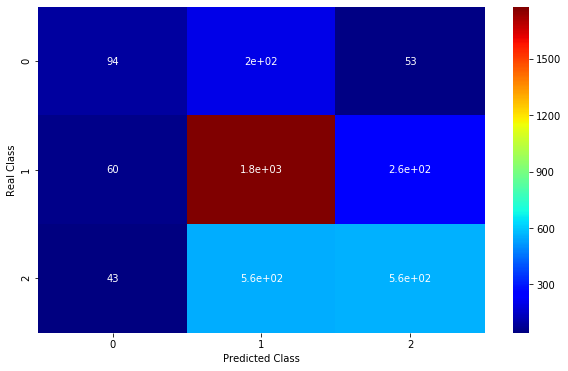

In [66]:
best_tree = grid_tree.best_estimator_
best_tree.fit(X_train_std, y_train)

y_pred_train = best_tree.predict(X_train_std)
y_pred_test = best_tree.predict(X_test_std)
print("="*80)
print(model.__class__.__name__)
print("="*80)
print("Train: ", accuracy_score(y_train, y_pred_train))
print("Test: ", accuracy_score(y_test, y_pred_test))
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)

### Otras métricas

La matriz de confusión tiene la forma

|                |                | 
| :------------- | -------------: |
| True Negative  | False Positive |
| False Negative | True Positive  |

Una metrica que nos dice el accuracy que tenemos sobre los valores verdaderos es **precision**. Nos dice cuantos de los valores que detectameos como verdaderos realmente lo son:

$precision = \frac{TP}{TP+FP}$

Otra metrica interesante es **recall**. Nos dice que tan bueno fue el algoritmo para detectar bien a los positivos.

$recall = \frac{TP}{TP+FN}$

El **F1 score** es un promedio armonico de los 2 anteriores y solamnete va a tener un valor alto cuando los otros 2 sean altos

$F1 = 2 \times \frac{precision \times recall}{precision + recall}$

##### Score: Recall

Debido al debalance de clases y a ser un problema multiclase, usamos como score a **recall_macro**

In [67]:
param_grid = {
    "criterion":['gini', 'entropy'],
    "max_depth": [3, 4, 5, 7],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
    }
tree_clf = DecisionTreeClassifier(random_state=421)
grid_tree = GridSearchCV(tree_clf, param_grid=param_grid, cv=5, scoring="recall_macro")
grid_tree.fit(X_train_std, y_train)
means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, grid_tree.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

0.5645 (+/-0.0330) para {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}
0.5645 (+/-0.0330) para {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6}
0.5645 (+/-0.0330) para {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
0.5645 (+/-0.0330) para {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2}
0.5645 (+/-0.0330) para {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}
0.5645 (+/-0.0330) para {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4}
0.5622 (+/-0.0641) para {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
0.5622 (+/-0.0641) para {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}
0.5622 (+/-0.0641) para {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
0.5622 (+/-0.0641) para {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}
0.5622 (+/-0.0641) para {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.5622 (+/-0.0641) para {'criterion': 'gini', '

DecisionTreeClassifier
Train:  0.6785838250607428
Test:  0.6737923375902276
Train
--------------------------------------------------------------------------------
Accuracy 0.6785838250607428
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.43      0.45      0.44      1379
           I       0.72      0.83      0.77      8271
           S       0.68      0.49      0.57      4755

    accuracy                           0.68     14405
   macro avg       0.61      0.59      0.59     14405
weighted avg       0.68      0.68      0.67     14405



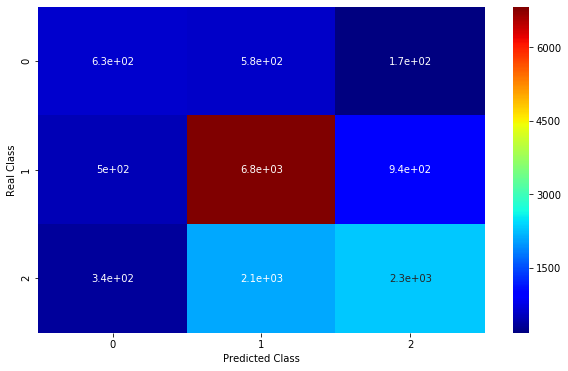

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.6737923375902276
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.41      0.41      0.41       351
           I       0.72      0.81      0.76      2095
           S       0.65      0.50      0.57      1156

    accuracy                           0.67      3602
   macro avg       0.60      0.58      0.58      3602
weighted avg       0.67      0.67      0.67      3602



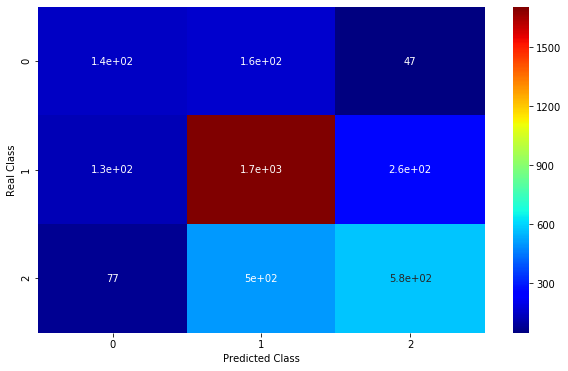

In [68]:
best_tree = grid_tree.best_estimator_
best_tree.fit(X_train_std, y_train)

y_pred_train = best_tree.predict(X_train_std)
y_pred_test = best_tree.predict(X_test_std)
print("="*80)
print(best_tree.__class__.__name__)
print("="*80)
print("Train: ", accuracy_score(y_train, y_pred_train))
print("Test: ", accuracy_score(y_test, y_pred_test))
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)

Vemos que al usar otro tipo de score la situacion de recall mejora, por apenas una pequeña penalidad en precision y una leve mejora en el accuracy